In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import os

In [21]:
veh = pd.read_csv(r"C:\Hogwarts\machine_learning\Cases\Vehicle Silhouettes\Vehicle.csv")

In [22]:
veh.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [23]:
X = veh.drop("Class", axis = 1)
y = veh["Class"]

In [37]:
le = LabelEncoder()
le_y = le.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [39]:
dtc = DecisionTreeClassifier(random_state= 2022,
                            max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

IndexError: list index out of range

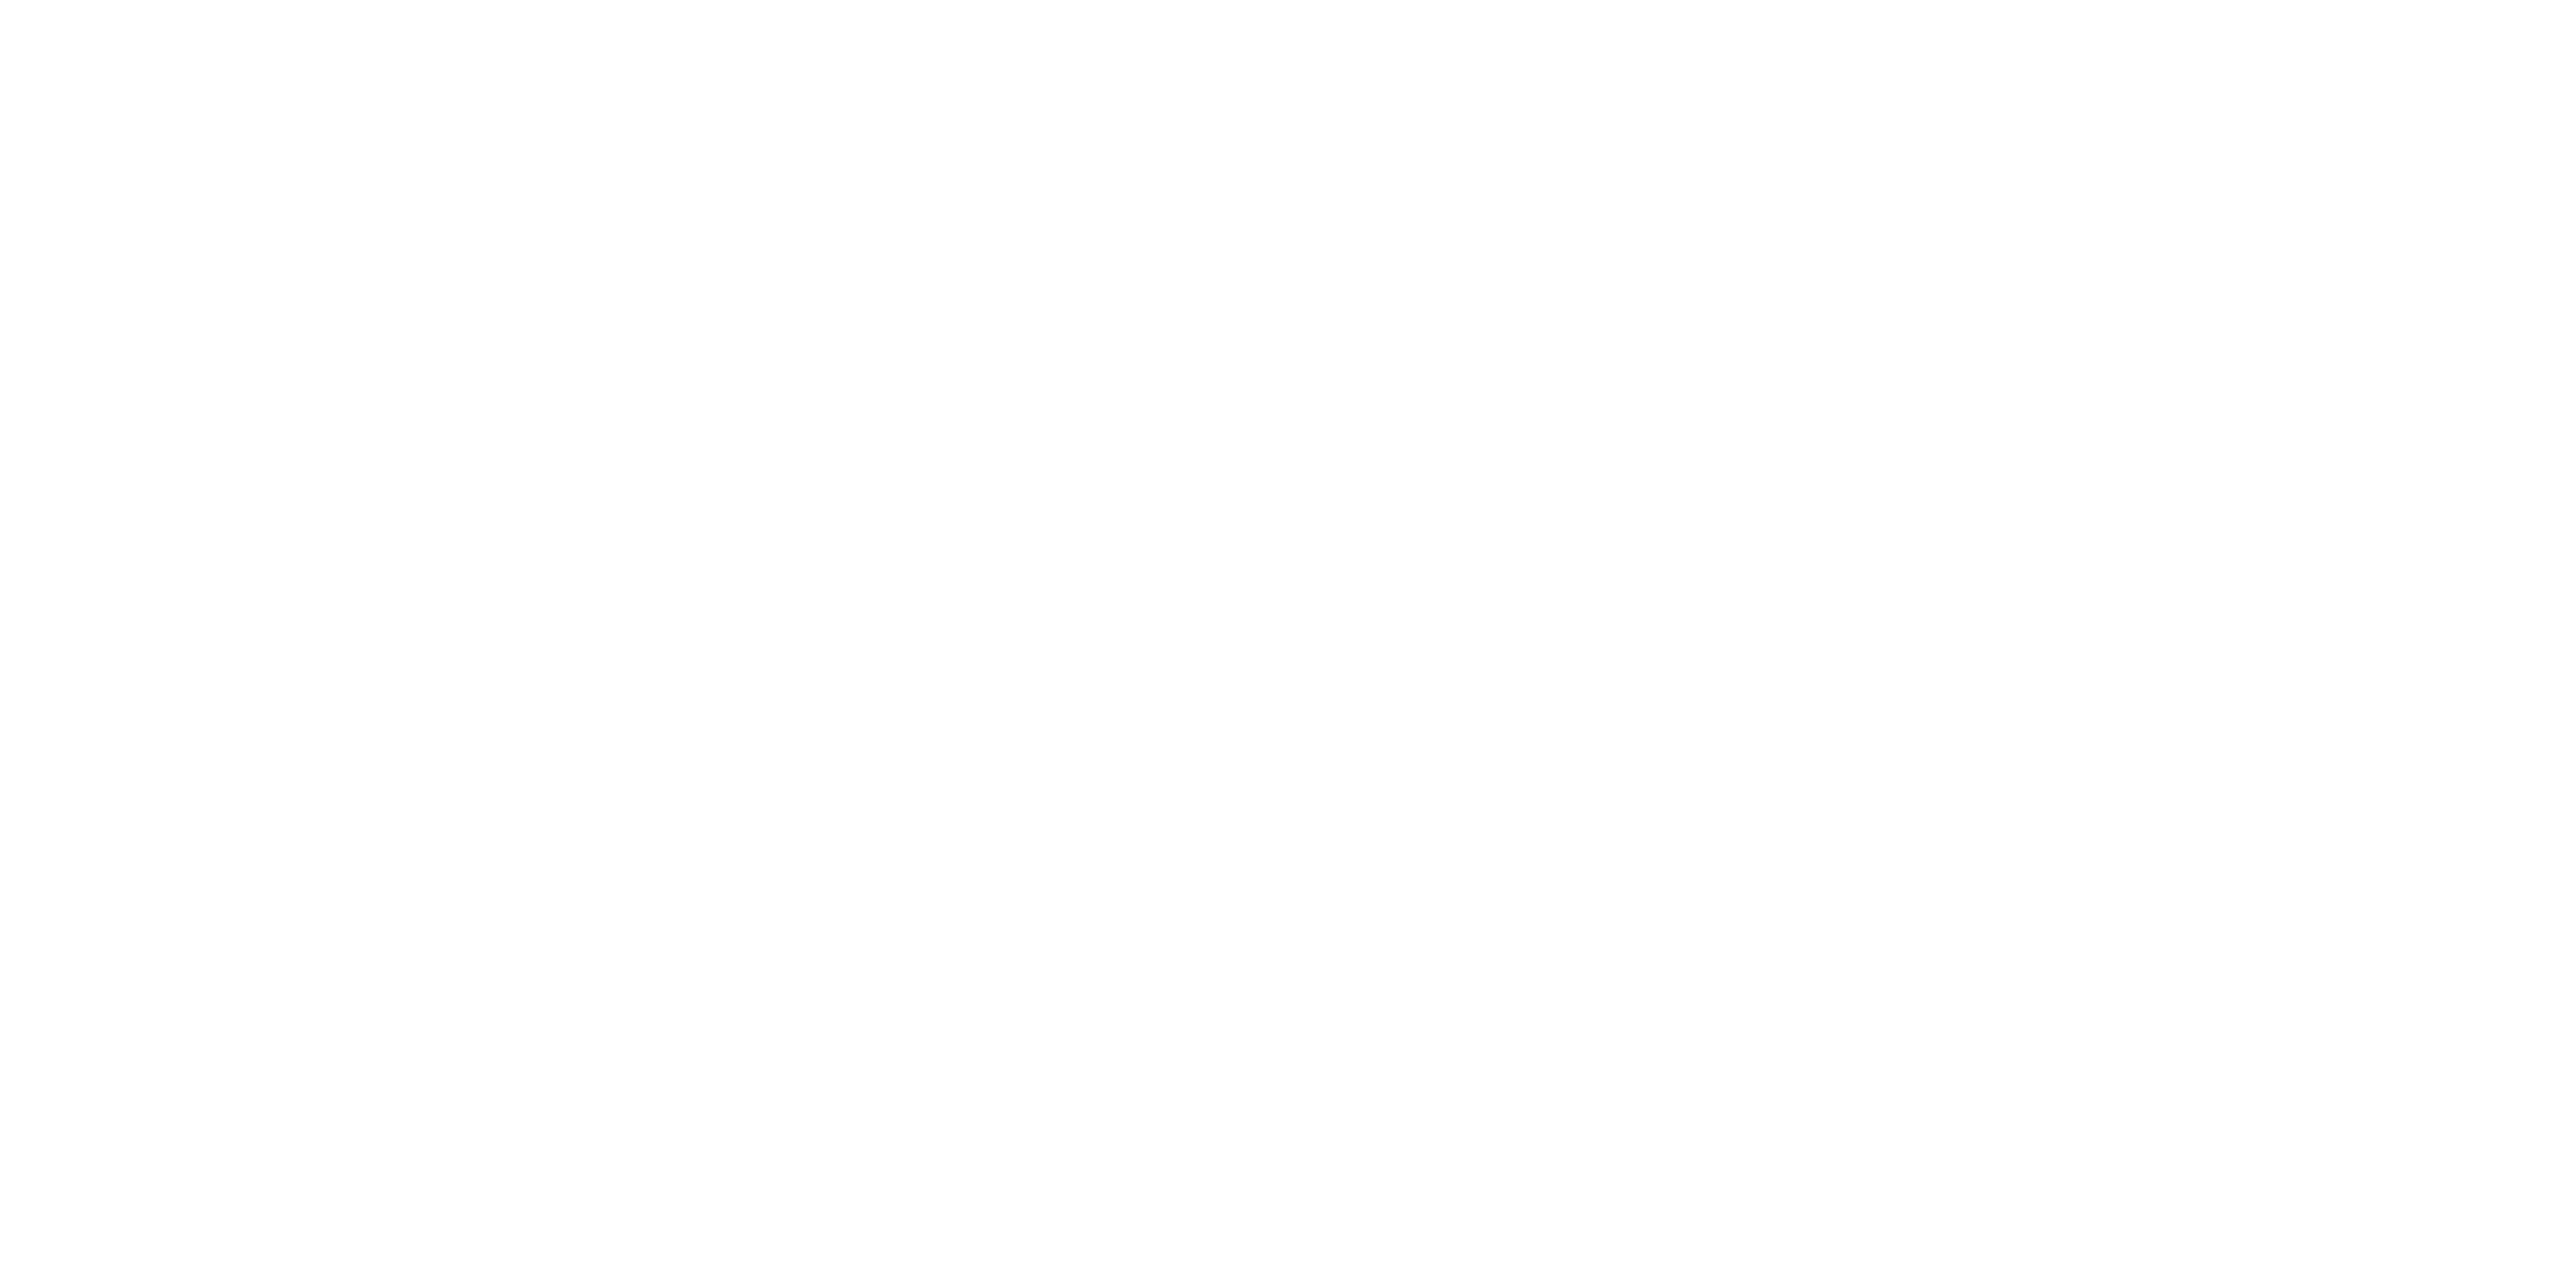

In [40]:
plt.figure(figsize = (40,20))
        
plot_tree(dtc,feature_names= X.columns,
         class_names = ['0','1'], fontsize = 14)

In [41]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.6417322834645669


In [12]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test , y_pred))

ValueError: could not convert string to float: 'bus'

In [33]:
dtc = DecisionTreeClassifier(random_state= 2022)

In [34]:
param = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [35]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [42]:
gcv  = GridSearchCV(dtc , param_grid = param, verbose=3,
                   cv = kfold,scoring='neg_log_loss')
gcv.fit(X,le_y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.050 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.008 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.922 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.895 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.943 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.050 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.008 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.922 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.895 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_

[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-0.948 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-0.983 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-1.263 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-1.030 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-1.301 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-0.948 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-0.983 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-1.263 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-1.030 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-1.301 total time=   0.0s

[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=-4.423 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=-7.230 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=-5.383 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=-4.579 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=-3.669 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=-4.423 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=-7.230 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=-5.383 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=10, min_samples_split=2;, score=-2.687 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=10, min_samples_split

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [43]:
print(gcv.best_params_)

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [44]:
print(gcv.best_score_)

-0.9394769812867446


IndexError: list index out of range

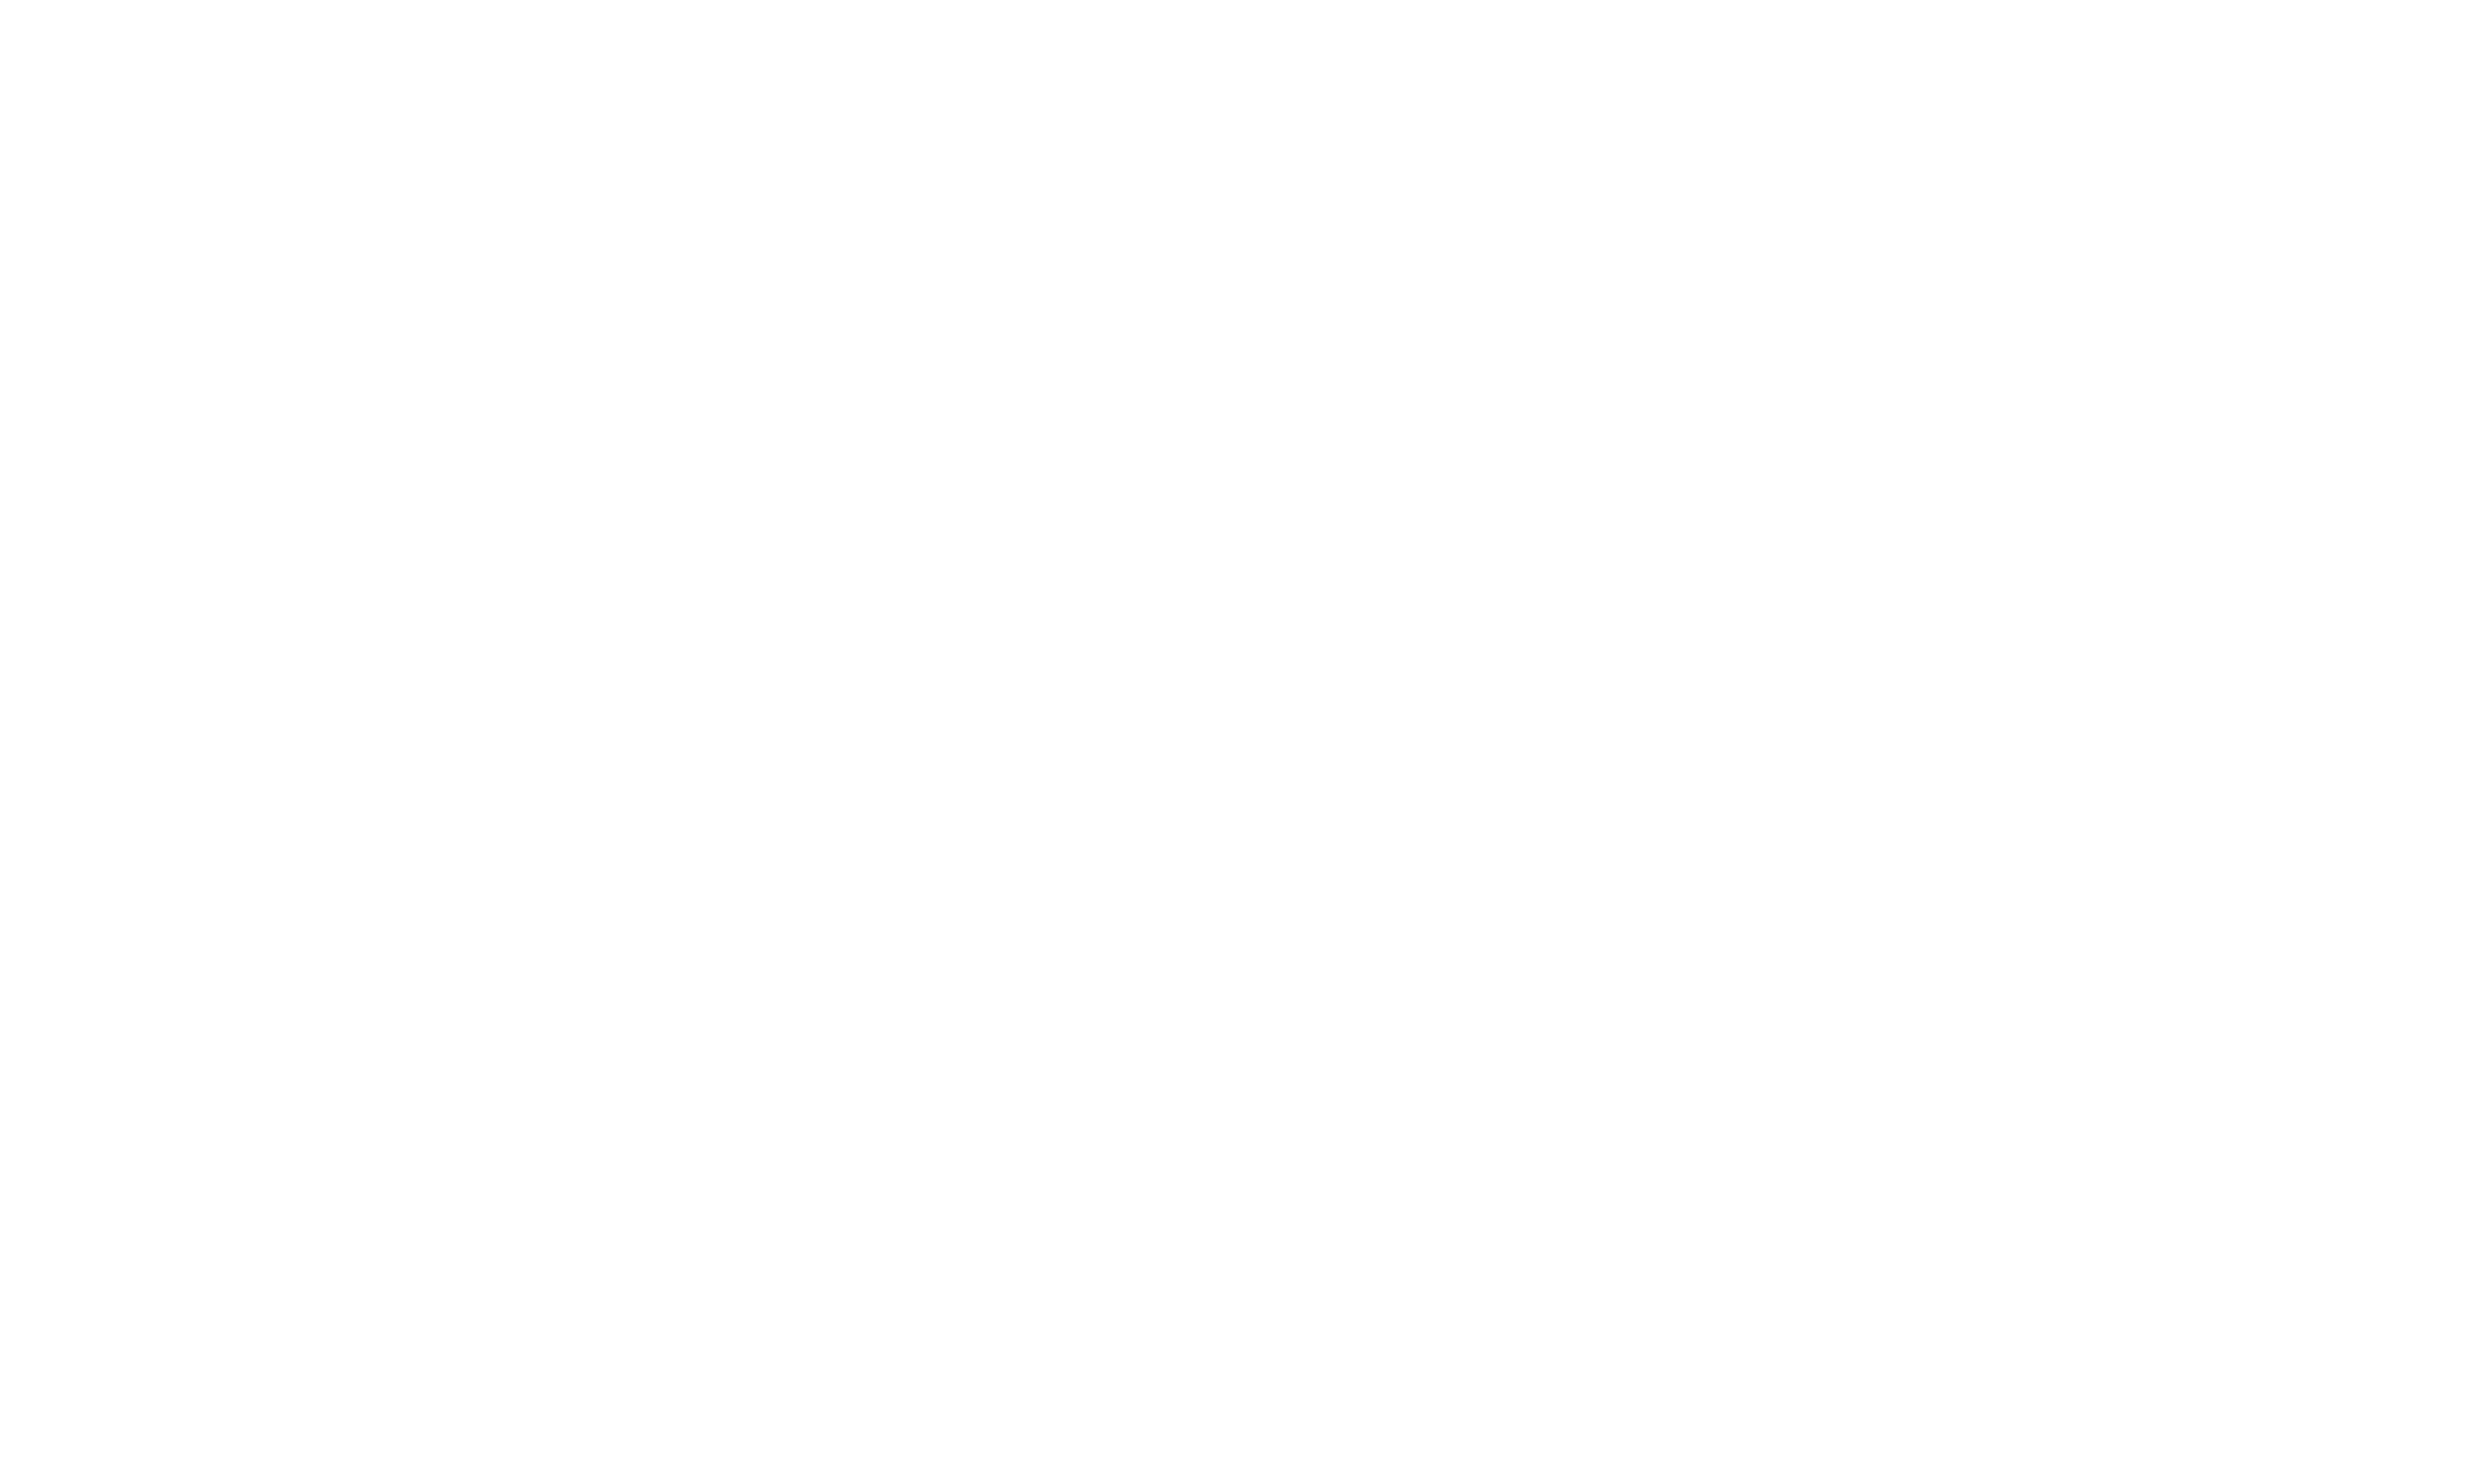

In [45]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names=X.columns,
          class_names = ['0','1'], fontsize = 13)
plt.show()